In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error

<Axes: title={'center': 'S&P CoreLogic Case-Shiller U.S. National Home Price Index'}, xlabel='time', ylabel='Index value'>

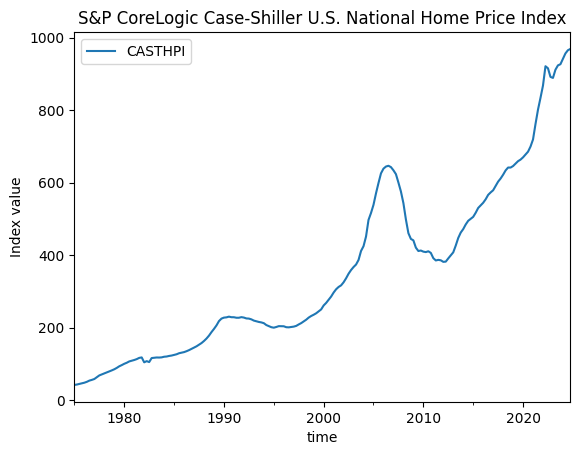

In [ ]:
DATASET_NAME = "CASTHPI"
df = pd.read_csv(DATASET_NAME + '.csv')
df['observation_date'] = pd.to_datetime(df['observation_date'])
df.set_index('observation_date', inplace=True)

df.plot(
    xlabel='time',
    ylabel='Index value',
    title='S&P CoreLogic Case-Shiller U.S. National Home Price Index',
)

In [ ]:
df.reset_index(inplace=True)
df.rename(columns={'observation_date': 'ds', DATASET_NAME: 'y'}, inplace=True)
df.head()

,ds,y
0,1975-01-01,41.69
1,1975-04-01,42.77
2,1975-07-01,44.35
3,1975-10-01,45.78
4,1976-01-01,47.82


In [ ]:
test_size = int(0.1 * len(df))
train_df = df.head(len(df) - test_size)
test_df = df.tail(test_size)
print("test size:", test_size)

test size: 20


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqdvtfkoi/qqn39qb5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqdvtfkoi/hpmlmb55.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84223', 'data', 'file=/tmp/tmpqdvtfkoi/qqn39qb5.json', 'init=/tmp/tmpqdvtfkoi/hpmlmb55.json', 'output', 'file=/tmp/tmpqdvtfkoi/prophet_modelg62iyarr/prophet_model-20250531202034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:20:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:20:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

0.22209156419919873
MAPE: 0.2221


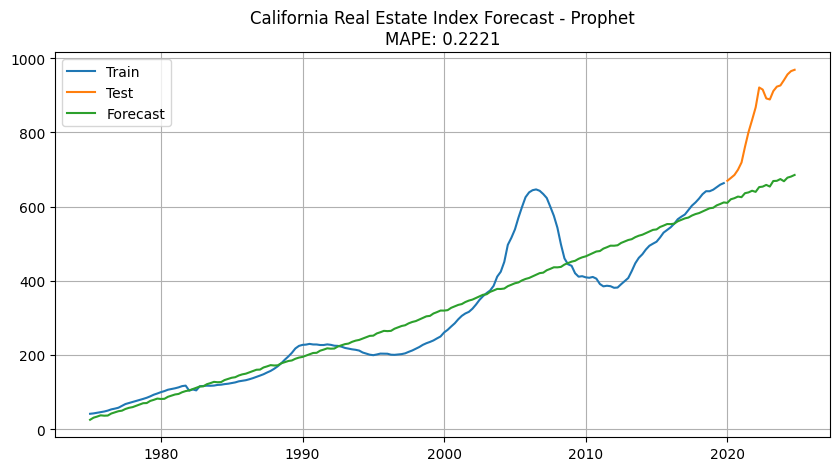

In [ ]:
model = Prophet()
model.fit(train_df)


future = model.make_future_dataframe(periods=20, freq='Q')

forecast = model.predict(future)

# align forecast and test data
forecast_test = forecast.tail(len(test_df))  # Get forecast matching test period

# calculate error
error = mean_absolute_percentage_error(test_df['y'], forecast_test['yhat'])
print(error)
print(f"MAPE: {error:.4f}")

# plot
plt.figure(figsize=(10,5))
plt.plot(train_df['ds'], train_df['y'], label="Train")
plt.plot(test_df['ds'], test_df['y'], label="Test")
plt.plot(forecast['ds'], forecast['yhat'], label="Forecast")
plt.title(f"California Real Estate Index Forecast - Prophet\nMAPE: {error:.4f}")
plt.legend()
plt.grid()
plt.show()